<a href="https://colab.research.google.com/github/wayoo2019/Time-Series-analysis/blob/main/475_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount Google Drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Question 1

In [ ]:
m1 = pd.read_csv('/content/drive/MyDrive/475 Time Series/hw3/Measurement_Q1.csv', index_col='Time')
m1.head(3)

,Measurement
Time,
1,1.84
2,3.93
3,4.00


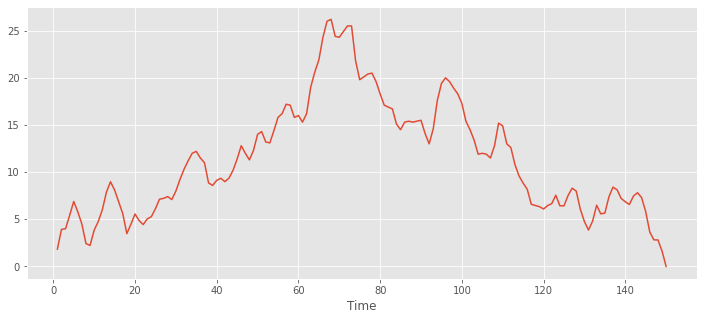

In [ ]:
#plot original data to see the shape over time
m1['Measurement'].plot(figsize=(12,5))

###1a

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_1a= ARIMA(m1, order=(0, 1, 1)) # MA(1,1)
model_1a_fit = model_1a.fit(disp=0)
print(model_1a_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Measurement   No. Observations:                  149
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Tue, 28 Sep 2021   AIC                            411.215
Time:                        02:15:20   BIC                            420.227
Sample:                             1   HQIC                           414.876
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.D.Measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                

###1b
Compute and Plot 1st order differencing

In [ ]:
m1.diff(periods=1)

,Measurement
Time,
1,NaN
2,2.09
3,0.07
4,1.42
5,1.47
...,...
146,-2.17
147,-0.83
148,-0.01


Text(0.5, 1.0, '1st order Differencing')

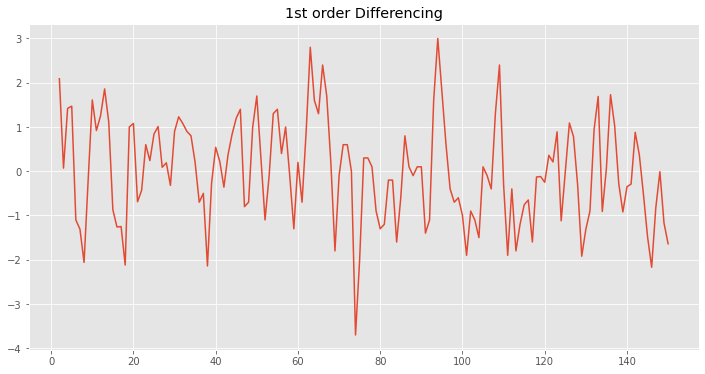

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(m1.diff(periods=1))
ax.set_title('1st order Differencing')

###1c
MA(1) on the 1st difference

In [ ]:
moddel_1c= ARIMA(m1['Measurement'].diff(periods=1).dropna(), order=(0, 0, 1))
moddel_1c_fit = moddel_1c.fit(disp=0)
print(moddel_1c_fit.summary())


                              ARMA Model Results                              
Dep. Variable:            Measurement   No. Observations:                  149
Model:                     ARMA(0, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Tue, 28 Sep 2021   AIC                            411.215
Time:                        02:15:21   BIC                            420.227
Sample:                             0   HQIC                           414.876
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.Measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                        

###1d

Both two models have same parameter output, since they used same parameter to compute models: 1. make first difference, 2. make MA (1).

##Question 2

In [ ]:
gat = pd.read_csv('/content/drive/MyDrive/475 Time Series/hw3/GlobalAirTemperature.csv', index_col='Year')
gat.head(3)

,"Anomaly, C"
Year,
1880,-0.11
1881,-0.13
1882,-0.01


###2a
Calculate IMA(1,1) SSE

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_2a= ARIMA(gat, order=(0, 1, 1)) #IMA(1,1)
model_2a_fit = model_2a.fit(disp=0)

#calculate MSE
mean_squared_error(gat['Anomaly, C'][1:], model_2a_fit.predict(typ='levels'))

0.017657394158603765

###2b
Calculate IMA(1,2) SSE

In [ ]:
model_2b= ARIMA(gat, order=(0, 1, 2)) #IMA(1,2)
model_2b_fit = model_2b.fit(disp=0)

#calculate MSE
mean_squared_error(gat['Anomaly, C'][1:], model_2b_fit.predict(typ='levels'))

0.016588714962441894

### 2c

2b IMA(1,1)  SSE = 0.016588714962441894 which is smaller than  2a IMA(1,a) SSE = 0.017657394158603765. thus, 2b IMA(1,1) is better. 

##Question 3

In [ ]:
m3 = pd.read_csv('/content/drive/MyDrive/475 Time Series/hw3/Measurement_Q3.csv', index_col='Year', parse_dates=True)
m3.head(3)

,Measurement
Year,
1950-01-01,2.429415
1951-01-01,2.363364
1952-01-01,2.374305


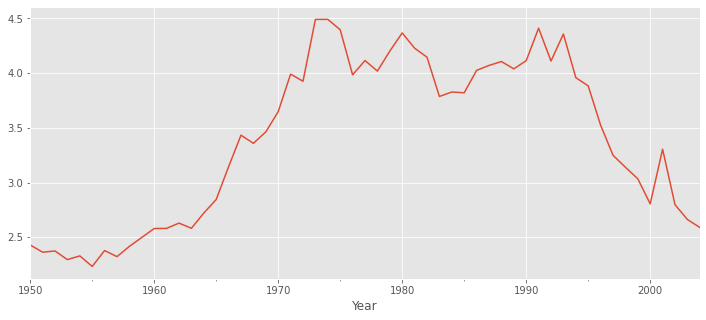

In [ ]:
m3['Measurement'].plot(figsize=(12,5))

###3a 


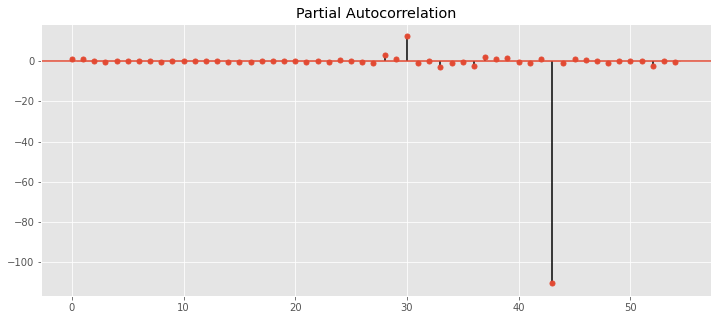

In [ ]:
import statsmodels.api as sm
plt.rc("figure", figsize=(12,5))
sm.graphics.tsa.plot_pacf(m3, lags=np.arange(len(m3)))
plt.show()

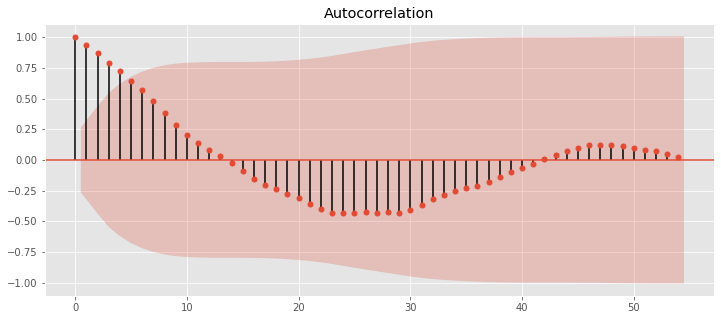

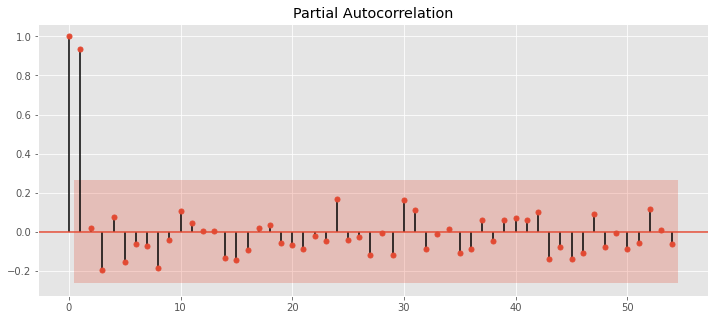

In [ ]:
import statsmodels.api as sm
plt.rc("figure", figsize=(12,5))
sm.graphics.tsa.plot_acf(m3, lags=np.arange(len(m3)))
sm.graphics.tsa.plot_pacf(m3, lags=np.arange(len(m3)), method="ywm")
plt.show()

###3b 

Text(0.5, 1.0, '1st order Differencing')

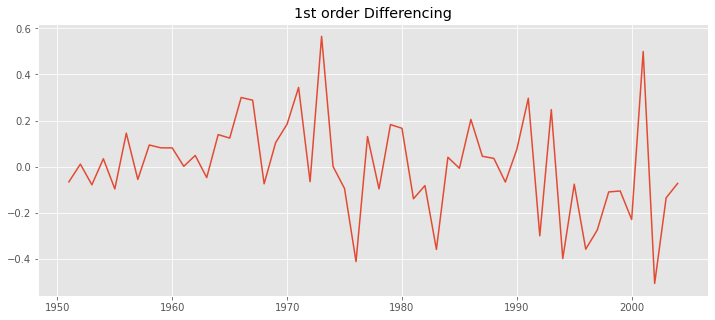

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(m3.diff(periods=1))
ax.set_title('1st order Differencing')

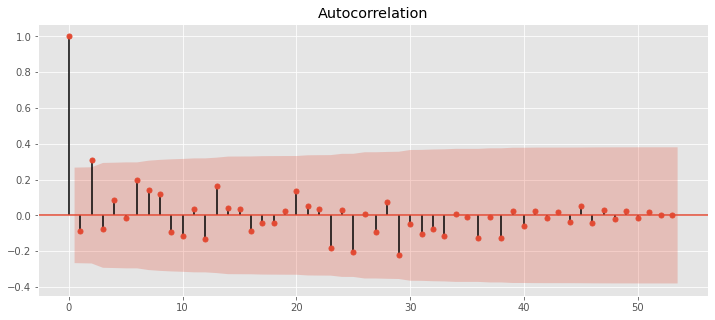

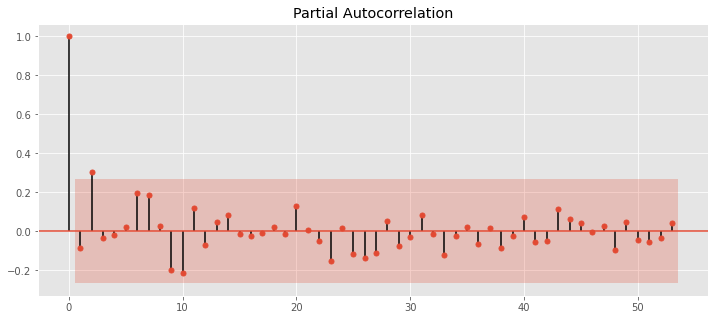

In [ ]:
plt.rc("figure", figsize=(12,5))

sm.graphics.tsa.plot_acf(m3['Measurement'].diff(periods=1).dropna(), lags=np.arange(len(m3)-1))
sm.graphics.tsa.plot_pacf(m3['Measurement'].diff(periods=1).dropna(), lags=np.arange(len(m3)-1), method="ywm")
plt.show()

###3c


1.  Without first order difference, the original data is non-stationary, so d = 1; 
2.   Wtth first order difference, ACF lag=2 is significant, and PACF lag=2 is also significant, so p=2, q=2

  Therefore, recommend ARIMA (p=2,d=1,q=2)  




